In [8]:
import pandas as pd
import numpy as np


In [7]:
df = pd.read_csv(r"C:\Users\dilka\Downloads\sales_data_project.csv")

In [10]:
#step 1: simulate a dataset
np.random.seed(42)
data = {
    'OrderID': range(1, 201),
    'Date': pd.date_range(start='2023-01-01', periods=200, freq='D'),
    'Product': np.random.choice(['Product A', 'Product B', 'Product C', 'Product D'], 200),
    'Category': np.random.choice(['Electronics', 'Clothing', 'Home', 'Toys'], 200),
    'Quantity': np.random.randint(1, 10, 200),
    'Price': np.random.randint(10, 100, 200)
}

In [11]:
df = pd.DataFrame(data)

#Add derived columns
df['Revenue'] = df['Quantity'] * df['Price']

df.head()

,OrderID,Date,Product,Category,Quantity,Price,Revenue
0,1,2023-01-01,Product C,Home,8,30,240
1,2,2023-01-02,Product D,Toys,4,45,180
2,3,2023-01-03,Product A,Home,1,19,19
3,4,2023-01-04,Product C,Electronics,8,82,656
4,5,2023-01-05,Product C,Toys,4,33,132


In [14]:
# step:2 data cleaning

#checking for missing values

missing_values = df.isnull().sum()

#check for duplicates
duplicates = df.duplicated().sum()

#Ensure correct data types
df['Date'] = pd.to_datetime(df['Date'])

#Add Month and Year for time-based analysis
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


#summary of cleaning process 
cleaning_summary = {
    "Missing Values": missing_values.sum(),
    "Duplicates": duplicates,
    "Rows in Dataset": len(df),
    "Columns in Dataset": len(df.columns)
}
cleaning_summary

{'Missing Values': 0,
 'Duplicates': 0,
 'Rows in Dataset': 200,
 'Columns in Dataset': 9}

In [15]:
import matplotlib.pyplot as plt

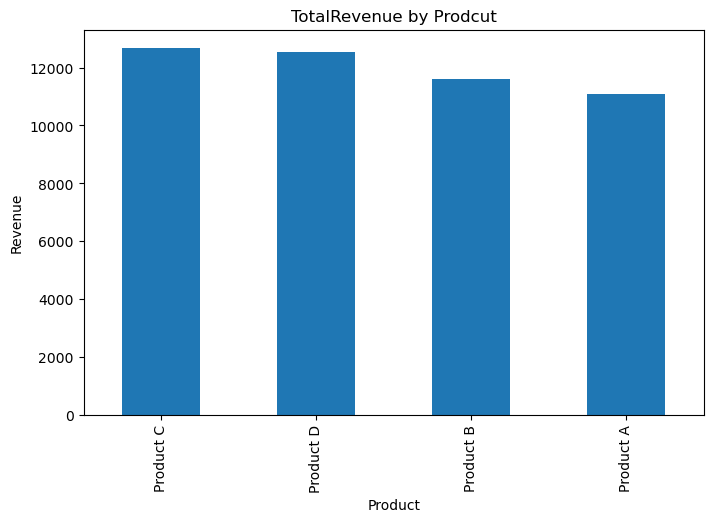

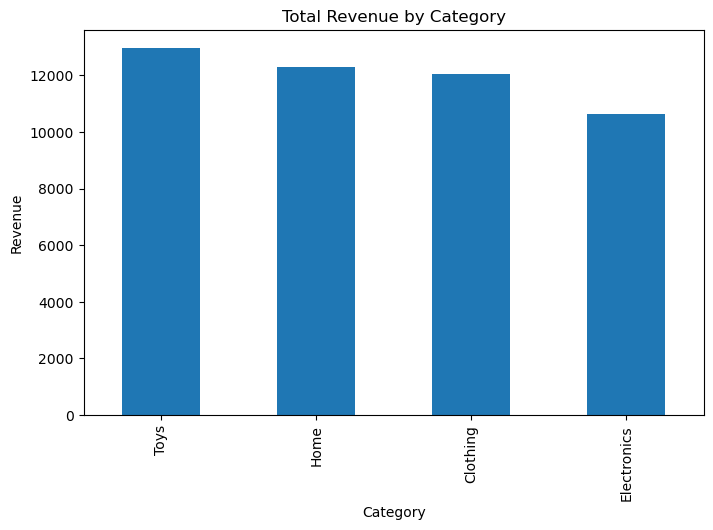

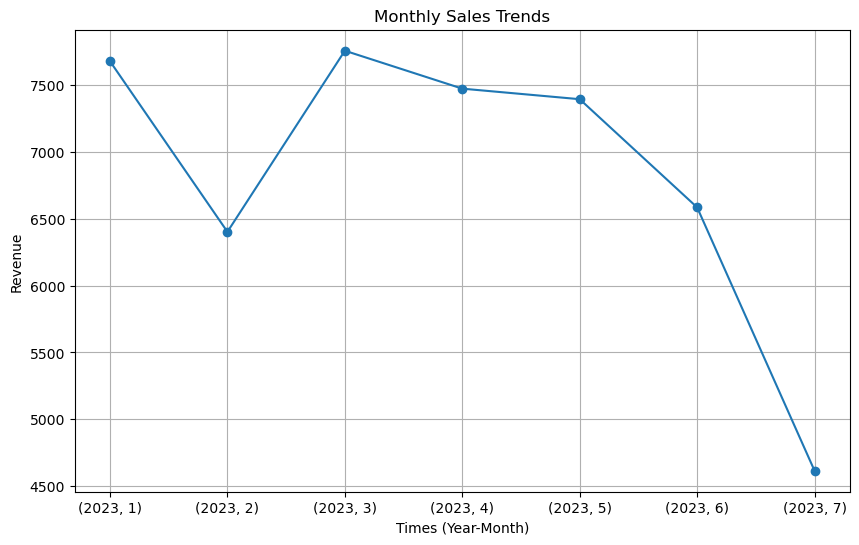

(Product
 Product C    12683
 Product D    12529
 Product B    11603
 Product A    11098
 Name: Revenue, dtype: int32,
 Category
 Toys           12949
 Home           12277
 Clothing       12062
 Electronics    10625
 Name: Revenue, dtype: int32)

In [17]:
#step 3: Exploartory Data Analysis (EDA)

#Total Revenue by Product
product_revenue = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)

#total Revenue by Category
category_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

#monthly_trends = df.groupby(['Year', 'Month'])['Revenue'].sum()
monthly_trends = df.groupby(['Year', 'Month'])['Revenue'].sum()

#visualizations
#1.Revenue by product 
plt.figure(figsize=(8, 5))
product_revenue.plot(kind='bar')
plt.title('TotalRevenue by Prodcut')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.show()

#2. Revenue by Category
plt.figure(figsize=(8, 5))
category_revenue.plot(kind='bar')
plt.title('Total Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.show()

#3. Monthly sales Trends
plt.figure(figsize=(10, 6))
monthly_trends.plot(marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Times (Year-Month)')
plt.ylabel('Revenue')
plt.grid()
plt.show()

#display summary talbes for detailed insight
top_products = product_revenue.head()
top_categories = category_revenue.head()

top_products, top_categories


In [ ]:
Insights from the Analysis:
Revenue by Product:

Top-performing product: Product C generated the highest revenue (12,683).
Product D and Product B followed closely in total revenue.
Revenue by Category:

Best-performing category: Toys with total revenue of 12,949.
Categories like Home and Clothing also performed well.
Monthly Sales Trends:

There are clear fluctuations in revenue over the months.
Peak months can be targeted for promotions or stock planning.
